In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from config import CACHE, FIGURES
from code_.encoding_score.regression.scores_tools import compute_bootstrap_distribution

device = 'cuda'

In [8]:
# choose dataset

batch_size = 10
dataset = 'majajhong_demo'
subjects = ['Tito','Chabo']
n_bootstraps = 100
n_rows = 10
region = 'IT'
features = 3

In [9]:
all_sampled_indices = np.random.choice(n_rows, (n_bootstraps, n_rows), replace=True) 

In [13]:
activations_identifier = 'alexnet_expansion_joint'
bootstrap_dist_joint = compute_bootstrap_distribution(activations_identifier, subjects, region,
                                        all_sampled_indices, batch_size, 
                                        n_bootstraps, dataset, device)

activations_identifier = f'expansion_features={features}_layers=5_dataset={dataset}_principal_components=100'
bootstrap_dist_expansion = compute_bootstrap_distribution(activations_identifier, subjects, region,
                                        all_sampled_indices, batch_size, 
                                        n_bootstraps, dataset, device)

activations_identifier = f'alexnet_trained_features=None_layers=5_dataset={dataset}_principal_components=100'
bootstrap_dist_alexnet = compute_bootstrap_distribution(activations_identifier, subjects, region,
                                        all_sampled_indices, batch_size, 
                                        n_bootstraps, dataset, device)



 50%|█████     | 1/2 [00:00<00:00,  1.23it/s]

100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


In [14]:
r_all = bootstrap_dist_joint.mean().cpu().numpy() **2
r_expansion = bootstrap_dist_expansion.mean().cpu().numpy() **2
r_alexnet = bootstrap_dist_alexnet.mean().cpu().numpy() **2

print(r_alexnet)
print(r_expansion)
print(r_all)

uniq_var_alexnet = r_all - r_expansion
uniq_var_expansion = r_all - r_alexnet
shared_var = (r_expansion + r_alexnet) - r_all

names = ['Expansion', 'AlexNet','Shared']

values = [uniq_var_expansion, uniq_var_alexnet, shared_var]

0.41196713
0.0755098
0.4119689


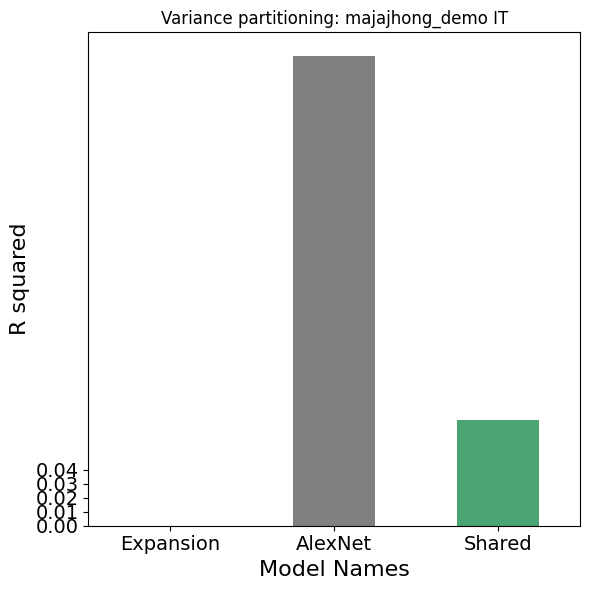

In [15]:
# Initialize the figure
plt.figure(figsize=(6, 6))

color_map = {
    'Expansion': 'royalblue',   
    'AlexNet':  'gray',   
    'Shared': 'mediumseagreen',  
}

palette = [color_map[n] for n in names]
# Plot the connectivity analysis without 'Linear' model
ax1 = sns.barplot(
    x=names, 
    y=values, 
    palette=palette,
    width=0.5
)
# Optional: Add labels and title for better understanding
ax1.set_title(f'Variance partitioning: {dataset} {region}')

ymin, ymax = 0.0, 0.04
step = 0.01
yticks = np.arange(ymin, ymax + step, step)
ax1.set_yticks(yticks)

ax1.tick_params(axis='x', labelsize=14)   # x-ticks at size 14
ax1.tick_params(axis='y', labelsize=14)                # y-ticks at size 14

# Axis labels
ax1.set_xlabel('Model Names', fontsize=16)
ax1.set_ylabel('R squared', fontsize=16)


# Show the plot
plt.tight_layout()
plt.show()